### To do:


In [1]:
# dataset interface should be {'train', 'dev', 'test'?, 'X_column', 'label_column'}
import pandas as pd
from hamison_datasets.UPV.load_upv import load_upv_dataset

upv = load_upv_dataset()
# upv_notmapped = load_upv_dataset(map_values=False)

ds = upv[upv['text'].notnull()]
campañas = upv['¿Qué campaña?'].unique().tolist()
campañas_order = {v: k for k, v in enumerate(campañas)}

upv_features = ['1. Espacio',
                '2. Texto', '3. Multimedia', '4. Elemento desinformador',
                '5.  Tipo multimedia', '6. Alteración multimedia',
                '7. Cuenta emisora', '8. Fuente',
                '9. Protagonista', '10. Atributo',
                '11. Macro tema', '12. Populismo',
                '13. Ataque', '14. Tipo de ataque']
upv_features = [c for c in upv.columns if '.' in c]
# for feat in upv_features:
#     print(upv[feat].value_counts(), '\nTotal:',
#           upv[(upv['text'].notnull() & upv[feat].notnull())].shape[0], '\n')
upv.columns

Loaded UPV dataset from UPV_allURLs.csv
Loading html files...
Removing rows without html: [6668]


Extracting articles from HTML:   0%|          | 0/408 [00:00<?, ?it/s]

Index(['Medio', 'Título desmentido', 'URL', 'Titular enlazado',
       '¿Periodo de campaña?', '¿Qué campaña?', '¿Campaña?', 'Único',
       'Duplicado misma campaña', 'Corpus', 'Numeración duplicados',
       'ID Corpus', 'ID ALE', '1. Espacio', '2. Texto', '3. Multimedia',
       '4. Elemento desinformador', '5.  Tipo multimedia',
       '6. Alteración multimedia', '7. Cuenta emisora', '8. Fuente',
       '9. Protagonista', '10. Atributo', '11. Macro tema', '12. Populismo',
       '13. Ataque', '14. Tipo de ataque', '5.  Tipo multimedia reduced',
       '7. Cuenta emisora reduced', '9. Protagonista reduced',
       '14. Tipo de ataque reduced', 'html', 'article', 'text'],
      dtype='object')

In [23]:
# load results GPT
import pandas as pd
from sklearn.metrics import f1_score


preds_gpt_9 = pd.read_json(
    'results/results_gpt-4o-mini_9.json'
).set_index('ID_Medio_Crono').rename(
    columns={'prediction': 'prediction_9', 'reasoning': 'reasoning_9'}
)

preds_gpt_1112 = pd.read_json(
    'results_gpt-4o-mini_11-12.json'
).set_index('ID_Medio_Crono').rename(
    columns={'theme': 'prediction_11', 'theme_reasoning': 'reasoning_11',
             'populist_strategy': 'prediction_12', 'populist_strategy_reasoning': 'reasoning_12', }
)

preds_gpt_1314 = pd.read_json(
    'results_gpt-4o-mini_13-14.json'
).set_index('ID_Medio_Crono').rename(
    columns={'attack': 'prediction_13', 'attack_reasoning': 'reasoning_13',
             'type_of_attack': 'prediction_14', 'type_of_attack_reasoning': 'reasoning_14', }
)

gpt = preds_gpt_9.join(preds_gpt_1112).join(preds_gpt_1314)

gpt = upv[[
    '¿Qué campaña?',
    '9. Protagonista', '10. Atributo',
    '11. Macro tema', '12. Populismo',
    '13. Ataque', '14. Tipo de ataque']].copy().join(gpt)
# label_preds = label_preds[label_preds['prediction'].notna()]


gpt

,¿Qué campaña?,9. Protagonista,10. Atributo,11. Macro tema,12. Populismo,13. Ataque,14. Tipo de ataque,prediction_9,reasoning_9,prediction_11,reasoning_11,prediction_12,reasoning_12,prediction_13,reasoning_13,prediction_14,reasoning_14
ID_Medio_Crono,,,,,,,,,,,,,,,,,
429,Gen19,"Gobiernos, partidos y dirigentes de derecha",Negativo,Campaign issues,Crítica a las élites,Sí,Electoral,"Gobiernos, partidos y dirigentes de derecha",The article discusses a statement made by José...,Political issues,The article discusses the political situation ...,Crítica a las élites,The article highlights an incorrect assertion ...,Sí,The article describes a situation where a poli...,Ideológico,The nature of the attack focuses on ideologica...
258,Gen19,"Gobiernos, partidos y dirigentes de izquierda",Negativo,Campaign issues,Defensa o apelación al pueblo,Sí,Antecedentes,"Gobiernos, partidos y dirigentes de izquierda",El artículo se centra principalmente en el deb...,Political issues,The article primarily discusses a political de...,Crítica a las élites,Pedro Sánchez's comments criticizing Pablo Igl...,Sí,El artículo describe un ataque verbal del cand...,De gestión,La acusación de Sánchez se centra en la gestió...
265,Gen19,"Gobiernos, partidos y dirigentes de derecha",Negativo,Campaign issues,Ostracismo,Sí,Asociación,"Gobiernos, partidos y dirigentes de derecha",El artículo habla sobre la coalición de gobier...,Political issues,The article primarily addresses the political ...,Crítica a las élites,The fact-checking article critiques a politica...,Sí,The article reviews a statement made by María ...,De gestión,The focus of the article is on the governing a...
365,Gen19,"Gobiernos, partidos y dirigentes de derecha",Negativo,Political issues,Crítica a las élites,Sí,Asociación,"Gobiernos, partidos y dirigentes de derecha",The article discusses the Partido Popular (PP)...,Political issues,The article addresses a specific claim made du...,Crítica a las élites,The statement by Pedro Sánchez is framed as be...,Sí,The article addresses a statement made by Pedr...,De gestión,The attack focuses on the management of govern...
377,Gen19,"Gobiernos, partidos y dirigentes de izquierda",Negativo,Political issues,Crítica a las élites,Sí,Antecedentes,"Gobiernos, partidos y dirigentes de izquierda",The article discusses statements made by Pablo...,Political issues,The article focuses on statements made by Pabl...,Crítica a las élites,Pablo Casado's claims are an example of critic...,Sí,El artículo responde a una afirmación hecha po...,De gestión,El ataque se centra en cuestionar la gestión d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6355,And22,"Gobiernos, partidos y dirigentes de derecha",Negativo,Campaign issues,Crítica a las élites,Sí,Electoral,"Gobiernos, partidos y dirigentes de derecha",The fact-checking article discusses a false cl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6358,And22,"Gobiernos, partidos y dirigentes de derecha",Negativo,Campaign issues,Crítica a las élites,Sí,Electoral,"Gobiernos, partidos y dirigentes de derecha",The protagonist of the article is Juanma Moren...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6360,And22,Personas migrantes,Negativo,Policy issues,Ostracismo,No,Sin ataque,Personas migrantes,The article refutes a false claim that pertain...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
predicted_vars = [col.split('_')[-1] for col in gpt.columns
                  if col.startswith('prediction')]

resultsGPT = []
for v in predicted_vars:
    # find column names
    feat = next(col for col in gpt if col.startswith(v))
    pred_col = f'prediction_{v}'
    for campaña, g in gpt.groupby('¿Qué campaña?'):
        # available_preds = g[pred_col].isna().value_counts()
        # display(campaña, available_preds)
        g_ = g[g[feat].notna() & g[pred_col].notna()]
        f1 = f1_score(y_true=g_[feat], y_pred=g_[pred_col], average='macro')
        resultsGPT.append(
            {'feat': feat, "test": campaña, "f1": f1, 'clf': "gpt-4o-mini"}
        )
resultsGPT = pd.DataFrame(resultsGPT)

In [ ]:


resultsGPT = []
for campaña, g in preds_gpt_wlabels.groupby('¿Qué campaña?'):
    display(campaña, g['prediction_9'].isna(
    ).value_counts(dropna=False))
    g = g[g['prediction_9'].notna()]
    f1 = f1_score(
        y_true=g['9. Protagonista'], y_pred=g['prediction_9'], average='macro')
    resultsGPT.append(
        {'feat': '9. Protagonista',	'clf': "gpt-4o-mini", "test": campaña, "f1": f1}
    )

for campaña, g in preds_gpt_wlabels.groupby('¿Qué campaña?'):
    display(campaña, g['prediction_11'].isna(
    ).value_counts(dropna=False))
    g = g[g['prediction_11'].notna()]
    f1 = f1_score(
        y_true=g['11. Macro tema'], y_pred=g['prediction_11'], average='macro')
    resultsGPT.append(
        {'feat': '11. Macro tema',	'clf': "gpt-4o-mini", "test": campaña, "f1": f1}
    )


for campaña, g in preds_gpt_wlabels.groupby('¿Qué campaña?'):
    display(campaña, g['prediction_11'].isna(
    ).value_counts(dropna=False))
    g = g[g['prediction_12'].notna()]
    f1 = f1_score(
        y_true=g['12. Populismo'], y_pred=g['prediction_12'], average='macro')
    resultsGPT.append(
        {'feat': '12. Populismo',	'clf': "gpt-4o-mini", "test": campaña, "f1": f1}
    )


for campaña, g in preds_gpt_wlabels.groupby('¿Qué campaña?'):
    display(campaña, g['prediction_11'].isna(
    ).value_counts(dropna=False))
    g = g[g['prediction_13'].notna()]
    f1 = f1_score(
        y_true=g['13. Ataque'], y_pred=g['prediction_13'], average='macro')
    resultsGPT.append(
        {'feat': '13. Ataque',	'clf': "gpt-4o-mini", "test": campaña, "f1": f1}
    )


for campaña, g in preds_gpt_wlabels.groupby('¿Qué campaña?'):
    display(campaña, g['prediction_11'].isna(
    ).value_counts(dropna=False))
    g = g[g['prediction_14'].notna()]
    f1 = f1_score(
        y_true=g['14. Tipo de ataque'], y_pred=g['prediction_14'], average='macro')
    resultsGPT.append(
        {'feat': '14. Tipo de ataque',	'clf': "gpt-4o-mini", "test": campaña, "f1": f1}
    )

resultsGPT = pd.DataFrame(resultsGPT)

In [27]:
# calculate baselines

baselines = []
for feat in upv_features:
    df = upv[['¿Qué campaña?', feat]][upv[feat].notna()].copy()

    for camp, g in df.groupby('¿Qué campaña?'):

        # display(g[feat].mode().item())
        # display(g)
        # break

        try:
            g['mode'] = g[feat].mode()[0]

            baseline_f1 = f1_score(
                y_true=g[feat], y_pred=g['mode'], average='macro')

            # baseline_accuracy = accuracy_score(
            #     y_true=_g[feat], y_pred=_g['mode'], average='macro')

            baselines.append(
                {
                    'feat': feat, 'test': camp,
                    'f1': baseline_f1,
                    'clf': "baseline"
                }
            )
        except Exception as e:
            print(feat, camp)
            debug = g[feat].mode()
            display(g)


baselines = pd.DataFrame(baselines)

In [33]:
# load results
import pandas as pd


def list_to_tuple(ob):
    if isinstance(ob, list):
        return tuple(ob)
    else:
        return ob


resultsRF = pd.read_json('results/results_RF.json')
resultsRF['clf'] = 'RandomForest'

resultsRF_CV = pd.read_json('results/results_RF_CV.json')
resultsRF_CV['clf'] = 'RandomForest_CV'

# resultsBETO = pd.read_json('results_BETO.json')
# resultsBETO['clf'] = 'BETO'

resultsBETO_1e4 = pd.read_json('results/9/results_BETO_1e4.json')
resultsBETO_1e4['clf'] = 'BETO'

resultsBETO_1114 = pd.read_json('results/results_BETO_11-14.json')
resultsBETO_1114['clf'] = 'BETO'

resultsBETO = resultsBETO_1114

resultsBETO_CV = pd.read_json('results/results_BETO_CV.json')
resultsBETO_CV['clf'] = 'BETO_CV'


results = pd.concat([
                    baselines,
                    resultsRF, resultsBETO,
                    resultsRF_CV, resultsBETO_CV,
                    #  resultsBETO_1e4, resultsBETO_CV_1e4,
                    resultsGPT,
                    ]).reset_index(drop=True)

# sort
results['train'] = results['train'].apply(list_to_tuple)
results = results.sort_values(
    by=['test'], key=lambda x: x.map(campañas_order))
# results['predictions'] = results['preds'].apply(
#     lambda l: [p['prediction'] for p in l])
results_multiple_traincs = results[results.train.apply(type) == tuple]
results_single_traincs = results[results.train.apply(type) != tuple]

results.loc[results.clf.isin(
    ['baseline', 'BETO_CV', 'RandomForest_CV', 'gpt-4o-mini']), 'train'] = ''

In [34]:
# group results by campaign and visualize groups
import altair as alt


def join_elements(ob):
    if isinstance(ob, list) or isinstance(ob, tuple):
        return '+'.join(ob)
    else:
        return ob


for feat, g in results.groupby('feat', sort=True):
    if feat not in [
        # '9. Protagonista', '10. Atributo',
        #  '9. Protagonista reduced',
        '11. Macro tema', '12. Populismo',
        '13. Ataque', '14. Tipo de ataque',
        # '14. Tipo de ataque reduced'
    ]:
        continue

    byfeat = g.sort_values('f1', ascending=False)[
        ['feat', 'clf', 'train', 'test', 'f1']]

    byfeat['train'] = byfeat['train'].apply(join_elements)

    selection = alt.selection_point(
        fields=['clf'], bind='legend')  # bind=input_dropdown,

    hover = alt.selection_point(
        name="highlight", on="pointerover", empty=False)
    when_hover = alt.when(hover)
    stroke_width = (
        alt.when(hover).then(alt.value(1)).otherwise(alt.value(0))
    )
    stroke_color = (
        alt.when(hover).then(alt.ColorValue("black")
                             ).otherwise(alt.ColorValue("white"))
    )

    color = alt.condition(
        selection,
        alt.Color('clf:N', title='Estimator').scale(range=[
            'red', 'orange', 'blue', 'seagreen', 'coral', '#7D3C98']),
        alt.value('lightgray'))

    # order = alt.condition(
    # selection, 1, 0)

    points = alt.Chart(byfeat, width=420, title=feat).mark_point(
        filled=True, size=50, opacity=0.6, stroke='black'
    ).encode(
        y='f1', tooltip='train',  # tooltip=['clf', 'train', 'test', 'f1']
        color=color, order='clf',
        strokeWidth=stroke_width
    ).encode(
        alt.X('test', sort=list(campañas_order.keys()), title='Campaña test'),
        alt.Y('f1')
    ).add_params(selection, hover)  # .transform_filter(selection)

    # text = points.mark_text(
    #     align='left',
    #     baseline='middle',
    #     dx=7,
    #     fontSize=9
    # ).encode(
    #     text='train',
    #     color=alt.value("black")
    # )

    display(points)  # + text)

    # for camp, h in byfeat.groupby('test', sort=False):
    #     display(h)

    # for camp in campañas_order:
    #     display(byfeat[byfeat.test == camp])

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

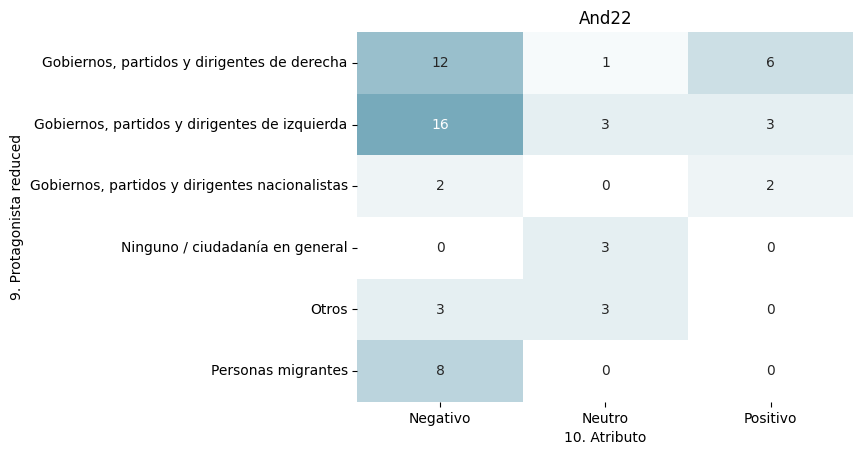

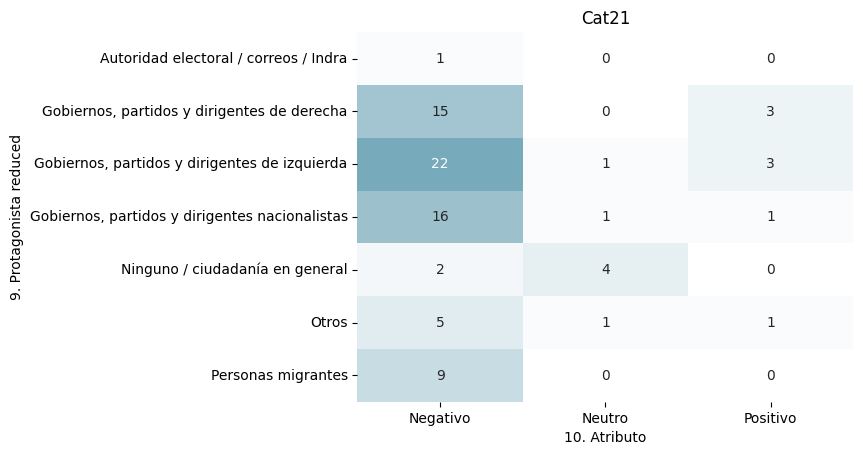

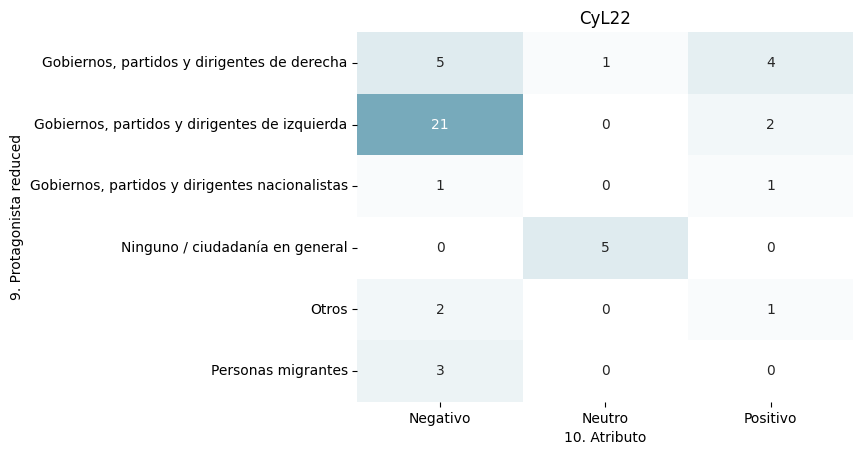

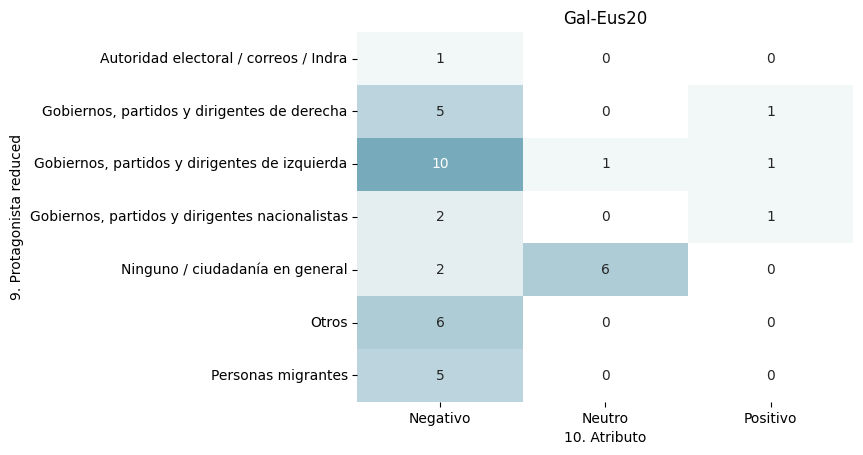

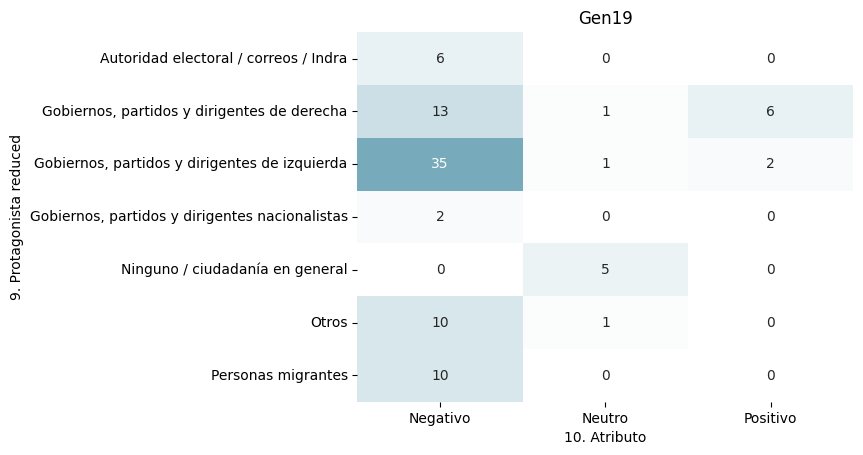

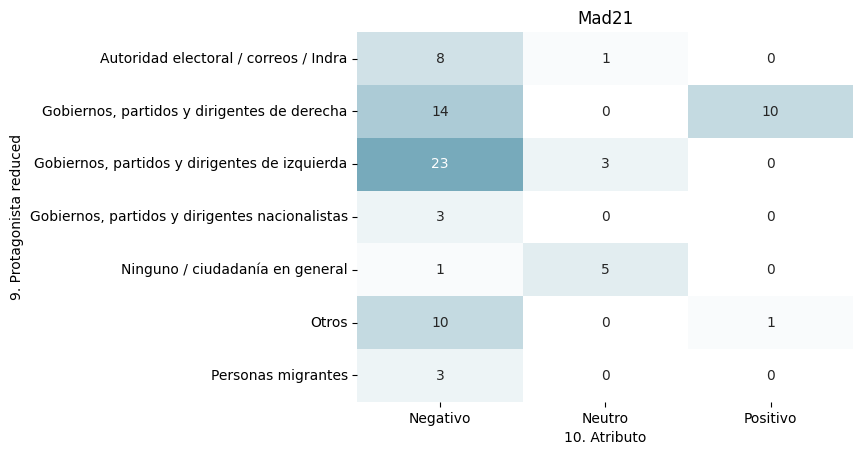

In [ ]:
# 2-dimension plots
import seaborn as sns
import matplotlib.pyplot as plt

feat_groups = [
    # ['9. Protagonista', '10. Atributo'],
    ['9. Protagonista reduced', '10. Atributo'],
]
palette = sns.color_palette("blend:#fff,#7AB", as_cmap=True)
for g in feat_groups:
    for camp, h in upv.groupby('¿Qué campaña?'):
        g_vals = h[g].value_counts(sort=False).unstack().fillna(0).astype(int)
        # display(g_vals)
        g_plot = sns.heatmap(g_vals, cmap=palette,
                             annot=True, fmt="0", cbar=False)
        g_plot.set(title=camp)
        plt.show()
        f_name = '-'.join([c.split('.')[0] for c in g]) + f"_{camp}"
        g_plot.figure.savefig(f"2dplots/{f_name}.png")

9. Protagonista,"Gobiernos, partidos y dirigentes de derecha","Gobiernos, partidos y dirigentes de izquierda",Ninguno / ciudadanía en general,Empresas y empresariado,Personas migrantes,Autoridad electoral / correos / Indra,"Gobiernos, partidos y dirigentes nacionalistas",Ejército y FFCC de Seguridad del Estado,Jefatura del Estado,"Organismos supranacionales / Sistema político ,internacional",Movimientos sociales progresistas,Mujeres,Instituciones de salud,Otros,Medios de comunicación / periodistas progresistas,"Judicatura, Magistratura y Poder Judicial",Medios de comunicación / periodistas conservadores,Referentes públicos progresistas,Ciudadano concreto sin relevancia pública,Sindicatos y sindicalistas
¿Qué campaña?,,,,,,,,,,,,,,,,,,,,
Gen19,20.0,38.0,5.0,3.0,10.0,6.0,2.0,1.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Gal-Eus20,6.0,12.0,8.0,0.0,5.0,1.0,3.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Cat21,18.0,26.0,6.0,0.0,9.0,1.0,18.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Mad21,24.0,26.0,6.0,0.0,3.0,9.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0
CyL22,10.0,23.0,5.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
And22,19.0,22.0,3.0,1.0,8.0,0.0,4.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


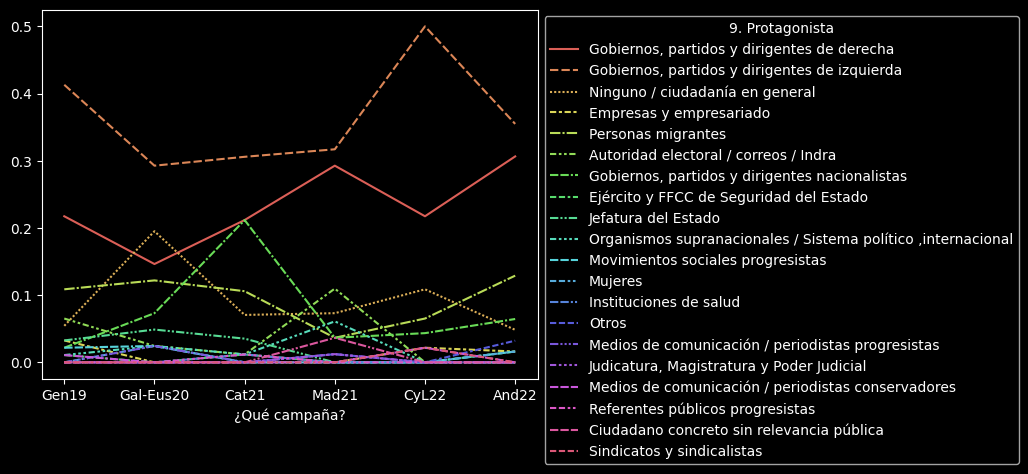

<Figure size 640x480 with 0 Axes>

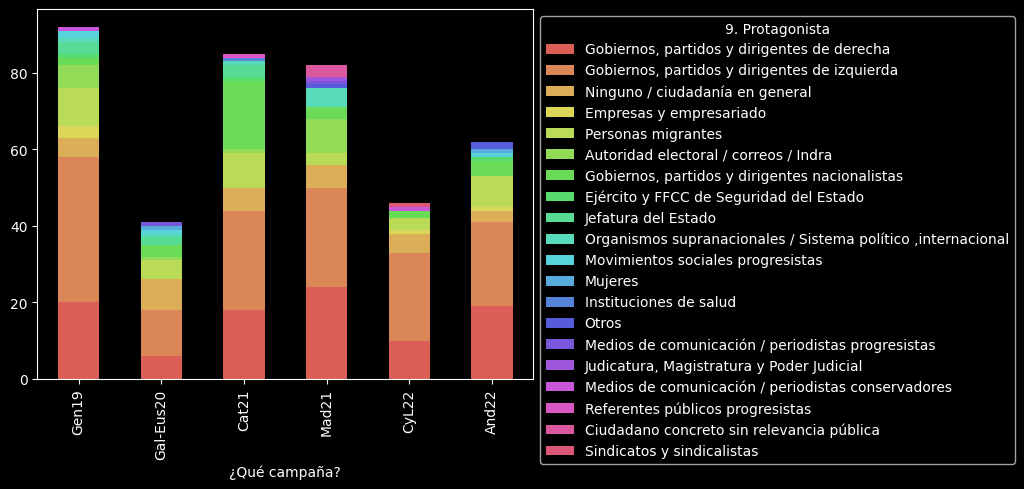

9. Protagonista reduced,"Gobiernos, partidos y dirigentes de derecha","Gobiernos, partidos y dirigentes de izquierda",Ninguno / ciudadanía en general,Otros,Personas migrantes,Autoridad electoral / correos / Indra,"Gobiernos, partidos y dirigentes nacionalistas"
¿Qué campaña?,,,,,,,
Gen19,20.0,38.0,5.0,11.0,10.0,6.0,2.0
Gal-Eus20,6.0,12.0,8.0,6.0,5.0,1.0,3.0
Cat21,18.0,26.0,6.0,7.0,9.0,1.0,18.0
Mad21,24.0,26.0,6.0,11.0,3.0,9.0,3.0
CyL22,10.0,23.0,5.0,3.0,3.0,0.0,2.0
And22,19.0,22.0,3.0,6.0,8.0,0.0,4.0


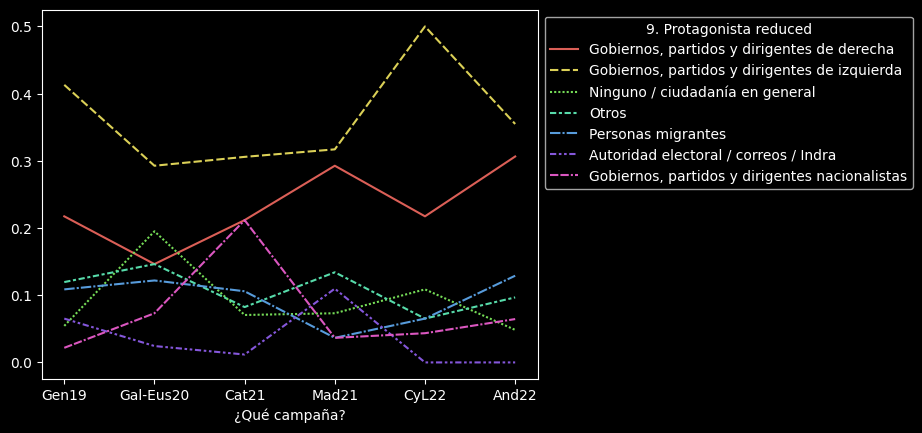

<Figure size 640x480 with 0 Axes>

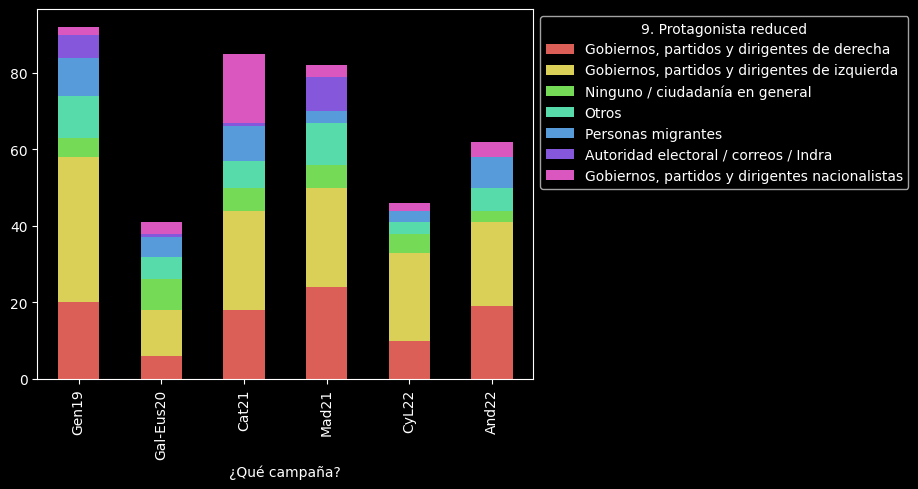

10. Atributo,Negativo,Positivo,Neutro
¿Qué campaña?,,,
Gen19,76,8,8
Gal-Eus20,31,3,7
Cat21,70,8,7
Mad21,62,11,9
CyL22,32,8,6
And22,41,11,10


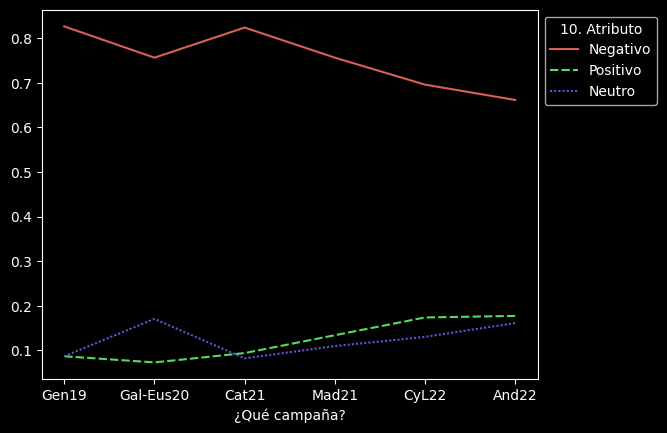

<Figure size 640x480 with 0 Axes>

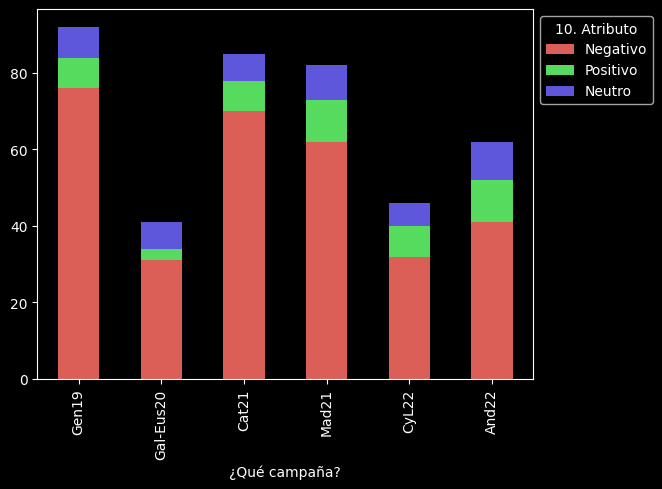

11. Macro tema,Campaign issues,Political issues,Policy issues,Personal issues
¿Qué campaña?,,,,
Gen19,19.0,23.0,44.0,6.0
Gal-Eus20,4.0,16.0,21.0,0.0
Cat21,9.0,24.0,46.0,6.0
Mad21,18.0,18.0,41.0,5.0
CyL22,2.0,12.0,29.0,3.0
And22,4.0,17.0,38.0,3.0


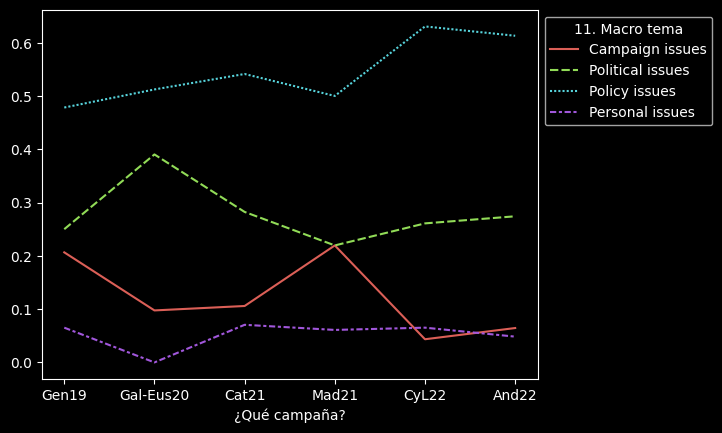

<Figure size 640x480 with 0 Axes>

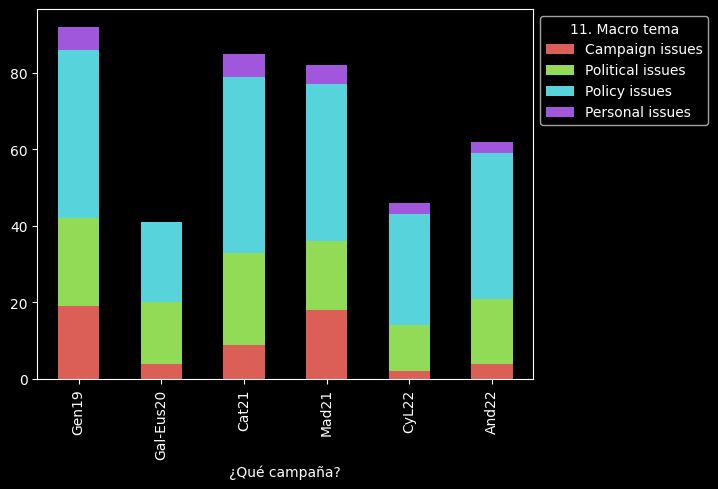

12. Populismo,Crítica a las élites,Defensa o apelación al pueblo,Ostracismo,Apelación a los valores patrióticos
¿Qué campaña?,,,,
Gen19,43,26,18,5
Gal-Eus20,21,6,13,1
Cat21,46,16,17,6
Mad21,51,18,9,4
CyL22,20,15,7,4
And22,29,15,13,5


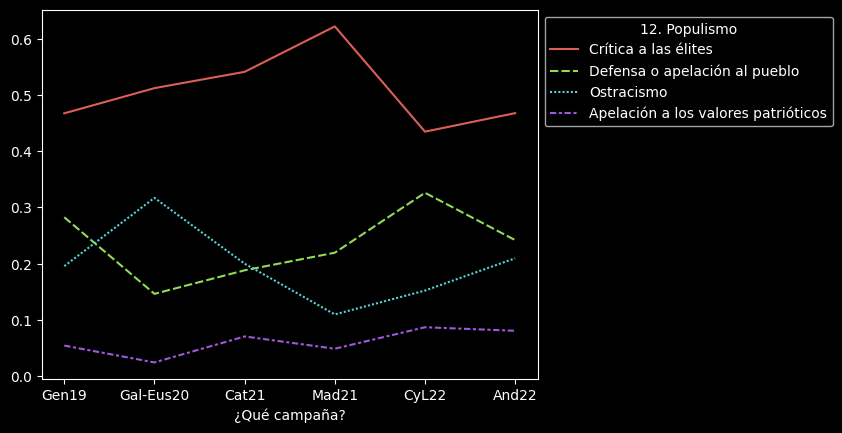

<Figure size 640x480 with 0 Axes>

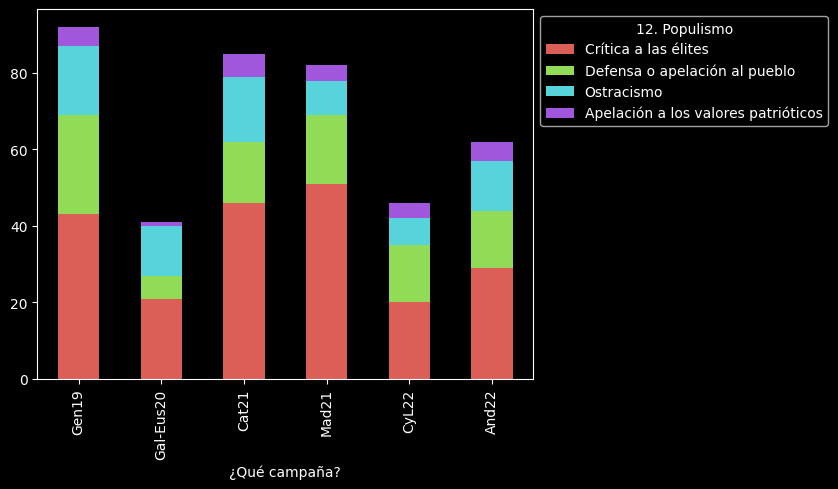

13. Ataque,Sí,No
¿Qué campaña?,,
Gen19,43,49
Gal-Eus20,14,27
Cat21,43,42
Mad21,32,50
CyL22,26,20
And22,30,32


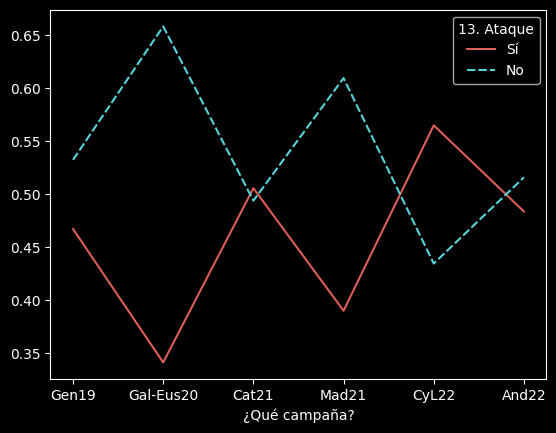

<Figure size 640x480 with 0 Axes>

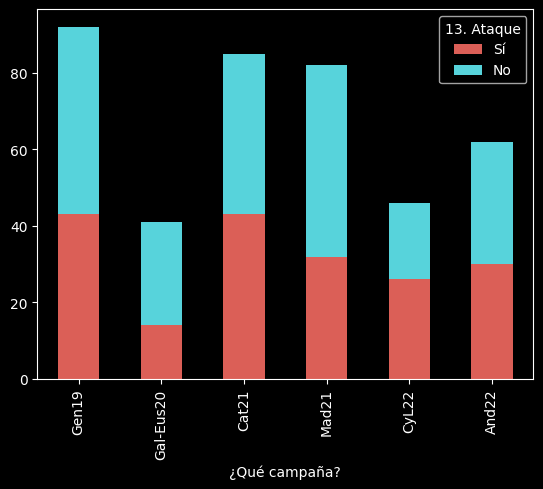

14. Tipo de ataque,Electoral,Antecedentes,Asociación,Sin ataque,Ideológico,De gestión,Personal,Programa
¿Qué campaña?,,,,,,,,
Gen19,10.0,3.0,4.0,49.0,12.0,7.0,4.0,3.0
Gal-Eus20,0.0,0.0,0.0,27.0,4.0,7.0,2.0,1.0
Cat21,1.0,4.0,0.0,42.0,18.0,14.0,4.0,2.0
Mad21,5.0,2.0,1.0,50.0,9.0,10.0,5.0,0.0
CyL22,1.0,1.0,1.0,20.0,9.0,10.0,3.0,1.0
And22,2.0,2.0,0.0,32.0,13.0,9.0,2.0,2.0


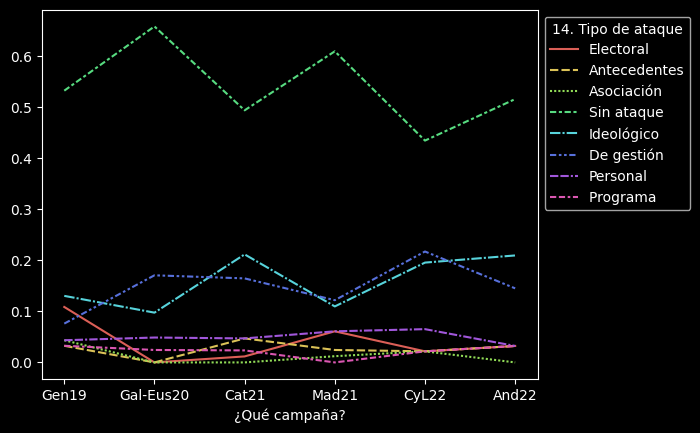

<Figure size 640x480 with 0 Axes>

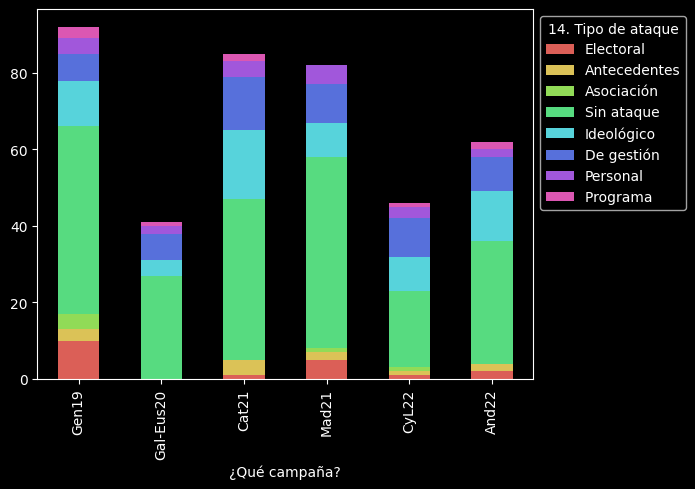

14. Tipo de ataque reduced,Electoral,Otros,Sin ataque,Ideológico,De gestión,Personal
¿Qué campaña?,,,,,,
Gen19,10.0,10.0,49.0,12.0,7.0,4.0
Gal-Eus20,0.0,1.0,27.0,4.0,7.0,2.0
Cat21,1.0,6.0,42.0,18.0,14.0,4.0
Mad21,5.0,3.0,50.0,9.0,10.0,5.0
CyL22,1.0,3.0,20.0,9.0,10.0,3.0
And22,2.0,4.0,32.0,13.0,9.0,2.0


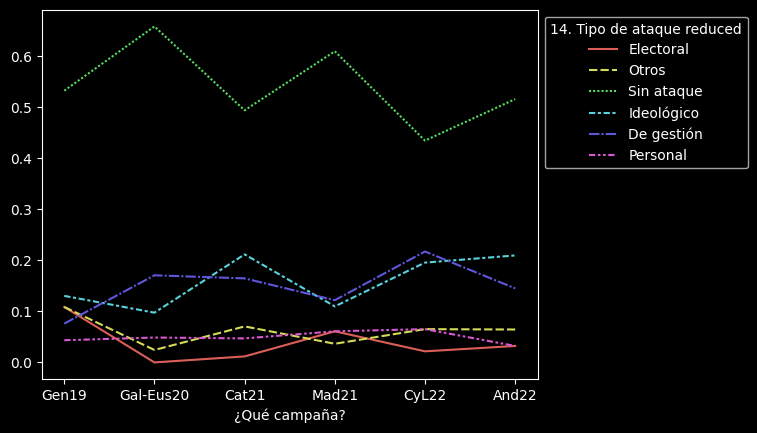

<Figure size 640x480 with 0 Axes>

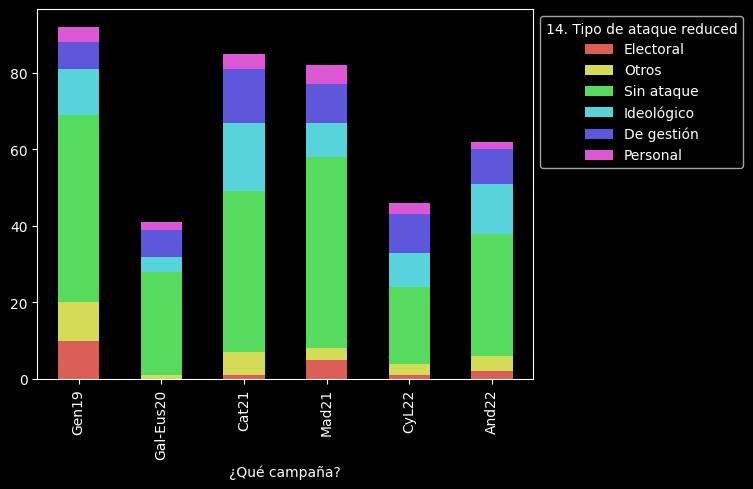

<Figure size 640x480 with 0 Axes>

In [4]:
# 1-d plots
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

upv_features = [
    # '1. Espacio',
    # '2. Texto', '3. Multimedia', '4. Elemento desinformador',
    # '5.  Tipo multimedia', '6. Alteración multimedia',
    # '7. Cuenta emisora', '8. Fuente',
    '9. Protagonista',
    '9. Protagonista reduced',
    '10. Atributo',
    '11. Macro tema', '12. Populismo',
    '13. Ataque', '14. Tipo de ataque',
    '14. Tipo de ataque reduced',
]


for feat in upv_features:
    grouped = upv.groupby('¿Qué campaña?', sort=False)[feat]
    counts = grouped.value_counts(normalize=False).unstack().fillna(0)
    norm_counts = grouped.value_counts(normalize=True).unstack().fillna(0)
    display(counts)

    palette = sns.color_palette("hls", len(counts.columns))

    # lineplot = norm_counts.plot.line(colormap=palette)
    lineplot = sns.lineplot(norm_counts, palette=palette)
    if len(counts.columns) > 2:
        sns.move_legend(lineplot, "upper left", bbox_to_anchor=(1, 1))

    lines_f_name = feat.split('.')[0] + '_lines'
    lineplot.figure.savefig(f"1dplots/{lines_f_name}.png")

    plt.show()
    plt.clf()

    # stacked = sns.histplot(counts, x='¿Qué campaña?',
    #    multiple='stack', palette=palette)
    stacked = counts.plot.bar(stacked=True, color=palette)
    if len(counts.columns) > 2:
        sns.move_legend(stacked, "upper left", bbox_to_anchor=(1, 1))

    bars_f_name = feat.split('.')[0] + '_bars'
    stacked.figure.savefig(f"1dplots/{bars_f_name}.png")

    plt.show()
    plt.clf()
    # display(lineplot)
    # display(stacked)

    # for name, g in upv.groupby('¿Qué campaña?'):
    #     display(g[feat].value_counts(normalize=True))
    # display(upv[feat].value_counts(dropna=False).plot())
    # display(upv[feat].describe())

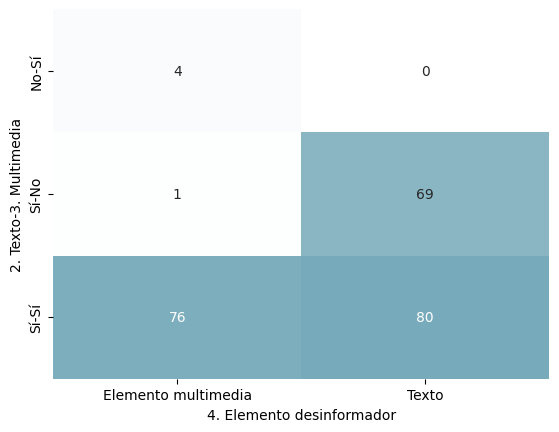

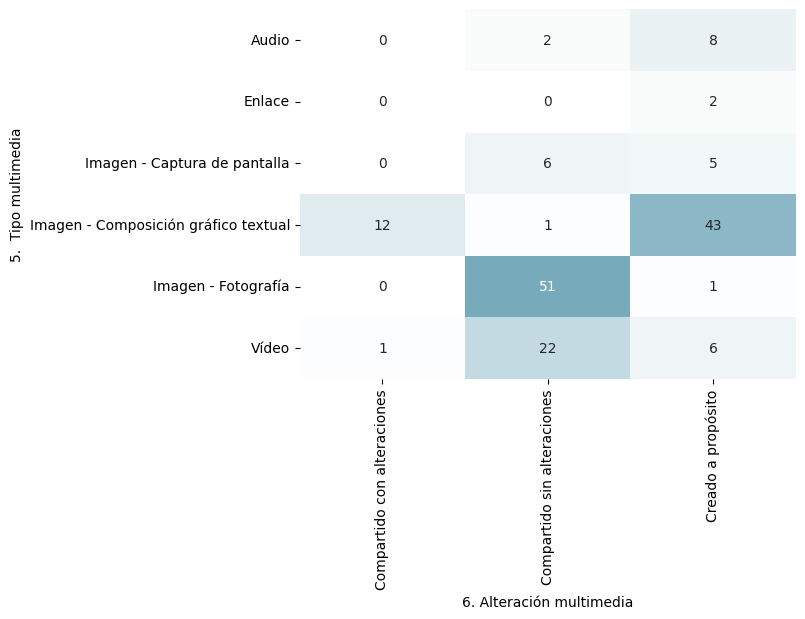

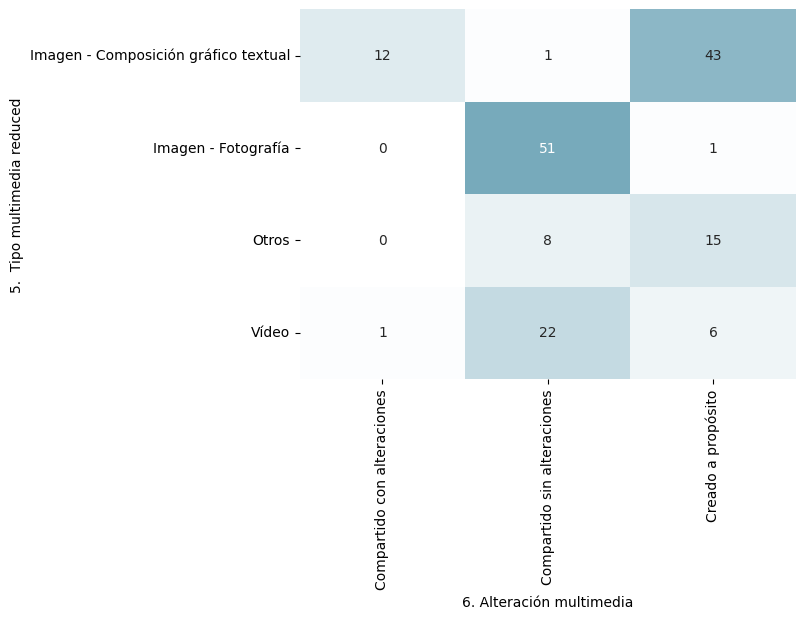

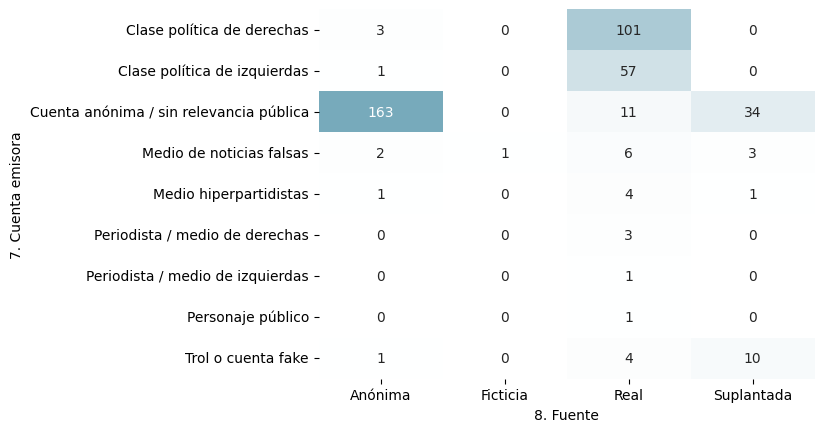

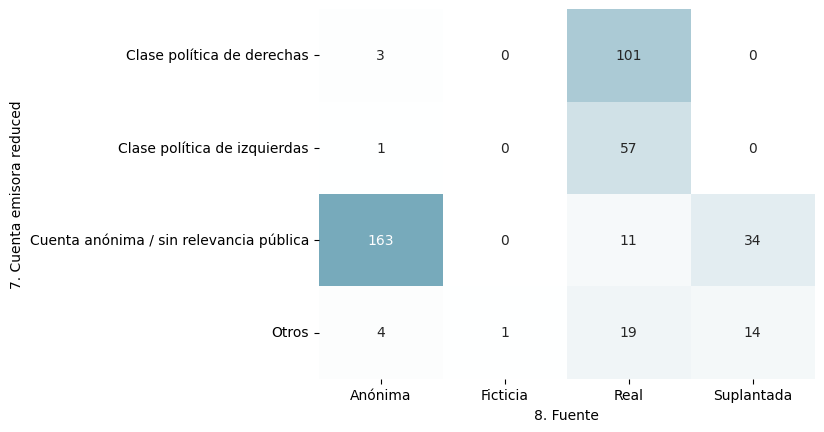

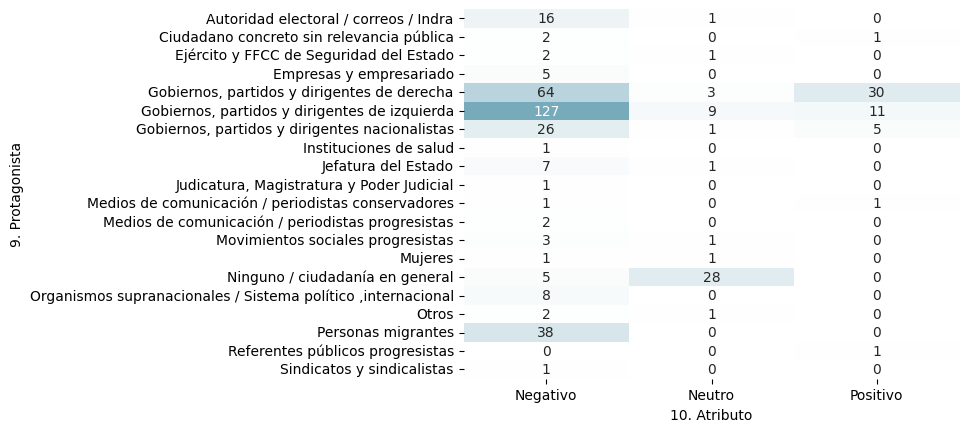

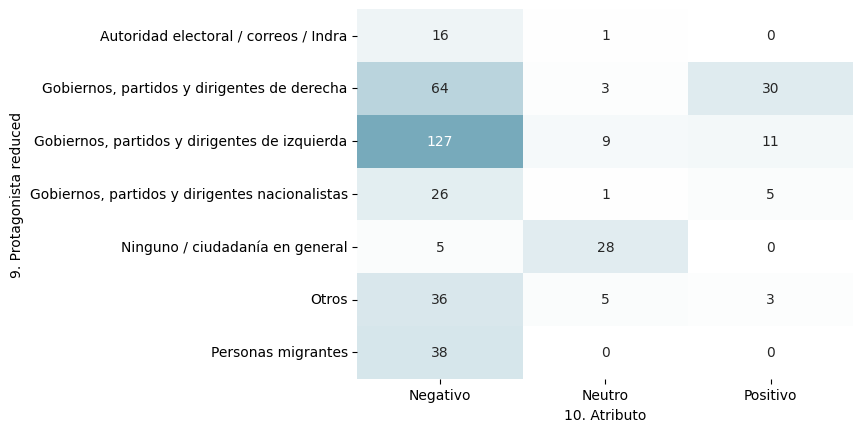

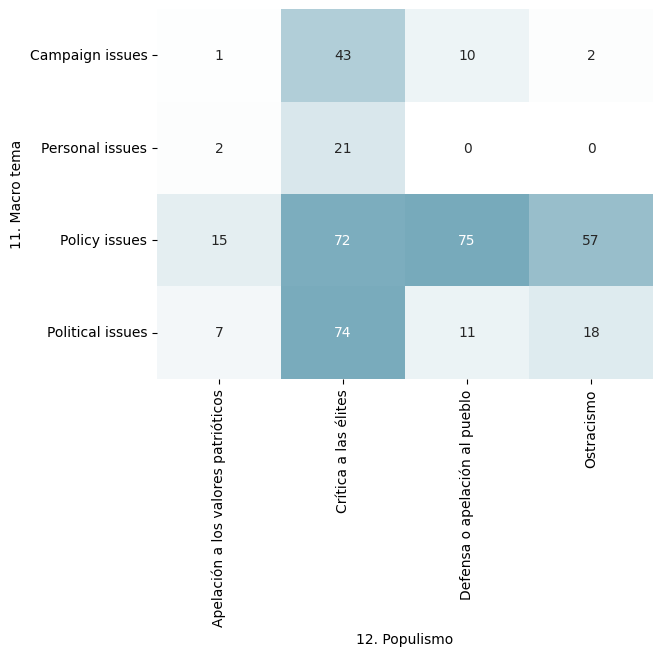

In [20]:
# 2-dimension plots
import seaborn as sns
import matplotlib.pyplot as plt

feat_groups = [
    ['2. Texto', '3. Multimedia', '4. Elemento desinformador'],
    # ['3. Multimedia', '5.  Tipo multimedia'],
    ['5.  Tipo multimedia', '6. Alteración multimedia'],
    ['5.  Tipo multimedia reduced', '6. Alteración multimedia'],
    ['7. Cuenta emisora', '8. Fuente'],
    ['7. Cuenta emisora reduced', '8. Fuente'],
    ['9. Protagonista', '10. Atributo'],
    ['9. Protagonista reduced', '10. Atributo'],
    ['11. Macro tema', '12. Populismo'],
    # ['13. Ataque', '14. Tipo de ataque']
    # ['13. Ataque reduced', '14. Tipo de ataque']
]
palette = sns.color_palette("blend:#fff,#7AB", as_cmap=True)
for g in feat_groups:
    g_vals = upv[g].value_counts(sort=False).unstack().fillna(0).astype(int)
    # display(g_vals)
    g_plot = sns.heatmap(g_vals, cmap=palette,
                         annot=True, fmt="0", cbar=False)
    plt.show()
    f_name = '-'.join([c.split('.')[0] for c in g])
    g_plot.figure.savefig(f"2dplots/{f_name}.png")

In [ ]:
# spotted an anotation error
upv[(upv['2. Texto'] == 'Sí') & (upv['3. Multimedia'] == 'No') &
    (upv['4. Elemento desinformador'] == 'Elemento multimedia')]['URL'].values

array(['https://maldita.es/malditobulo/20210203/el-pais-fiscalia-anticorrupcion-m-rajoy-papeles-barcenas/'],
      dtype=object)

In [50]:
upv['text'].str.split().str.len().describe()

count     408.000000
mean      805.102941
std       457.946092
min       129.000000
25%       453.500000
50%       724.500000
75%      1116.000000
max      3417.000000
Name: text, dtype: float64